### Problem Statement:-
##### Predict the person is earning more than 10k dollars or not based on his qualification, Expertise in Programming language and Year of Experience

### Importing necessary libraries 

In [91]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [139]:
df = pd.DataFrame({'Postgraduate':['Yes','Yes','No','No','Yes','Yes','No'],'Expertise in >3 lang':['Yes','No','Yes','Yes','Yes','No','No'],'Year of Exp':[7,12,18,20,21,23,25],'Salary more than $10k':['No','No','Yes','Yes','Yes','No','No']})
df

,Postgraduate,Expertise in >3 lang,Year of Exp,Salary more than $10k
0,Yes,Yes,7,No
1,Yes,No,12,No
2,No,Yes,18,Yes
3,No,Yes,20,Yes
4,Yes,Yes,21,Yes
5,Yes,No,23,No
6,No,No,25,No


In [93]:
df[(df['Postgraduate']=='Yes')&(df['Salary more than $10k']=='Yes')]

,Postgraduate,Expertise in >3 lang,Year of Exp,Salary more than $10k
4,Yes,Yes,21,Yes


In [94]:
df[(df['Postgraduate']=='Yes')&(df['Salary more than $10k']=='No')]

,Postgraduate,Expertise in >3 lang,Year of Exp,Salary more than $10k
0,Yes,Yes,7,No
1,Yes,No,12,No
5,Yes,No,23,No


In [95]:
df[(df['Postgraduate']=='No')&(df['Salary more than $10k']=='Yes')]

,Postgraduate,Expertise in >3 lang,Year of Exp,Salary more than $10k
2,No,Yes,18,Yes
3,No,Yes,20,Yes


In [96]:
df[(df['Postgraduate']=='No')&(df['Salary more than $10k']=='No')]

,Postgraduate,Expertise in >3 lang,Year of Exp,Salary more than $10k
6,No,No,25,No


In [97]:
df.columns

Index(['Postgraduate', 'Expertise in >3 lang', 'Year of Exp',
       'Salary more than $10k'],
      dtype='object')

In [98]:
df[(df['Expertise in >3 lang']=='Yes')&(df['Salary more than $10k']=='No')]

,Postgraduate,Expertise in >3 lang,Year of Exp,Salary more than $10k
0,Yes,Yes,7,No


In [99]:
new_df = df[(df['Expertise in >3 lang'] == 'Yes')]

In [100]:
new_df[(new_df['Postgraduate']=='No') & (new_df['Salary more than $10k']=='Yes')]

,Postgraduate,Expertise in >3 lang,Year of Exp,Salary more than $10k
2,No,Yes,18,Yes
3,No,Yes,20,Yes


In [105]:
new_df

,Postgraduate,Expertise in >3 lang,Year of Exp,Salary more than $10k
0,Yes,Yes,7,No
2,No,Yes,18,Yes
3,No,Yes,20,Yes
4,Yes,Yes,21,Yes


In [121]:
df_encoded

,Year of Exp,Salary more than $10k,Postgraduate_Yes,Expertise in >3 lang_Yes
0,7,No,True,True
1,12,No,True,False
2,18,Yes,False,True
3,20,Yes,False,True
4,21,Yes,True,True
5,23,No,True,False
6,25,No,False,False


Decision Tree Rules:
|--- Expertise in >3 lang_Yes <= 0.50
|   |--- class: No
|--- Expertise in >3 lang_Yes >  0.50
|   |--- Year of Exp <= 12.50
|   |   |--- class: No
|   |--- Year of Exp >  12.50
|   |   |--- class: Yes



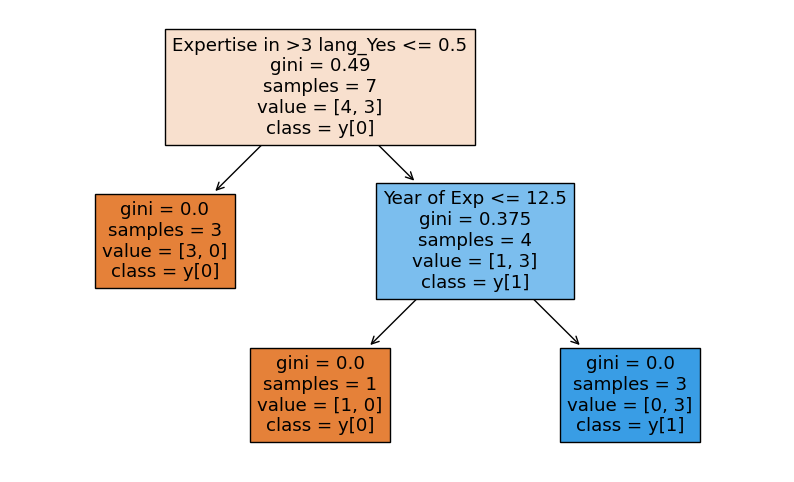

In [142]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import matplotlib.pyplot as plt


# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Postgraduate', 'Expertise in >3 lang'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded[['Year of Exp', 'Postgraduate_Yes', 'Expertise in >3 lang_Yes']]
y = df_encoded['Salary more than $10k']

# Create a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Print the decision tree rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

# Plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=True)
plt.show()


In [102]:
X

,Year of Exp,Postgraduate_Yes,Expertise in >3 lang_Yes
0,7,True,True
1,12,True,False
2,18,False,True
3,20,False,True
4,21,True,True
5,23,True,False
6,25,False,False


In [120]:
import numpy as np

# Your input data for prediction
check = [[15,True,True]]

# Make predictions
predictions = clf.predict(check)
print(predictions)


['Yes']
